In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rebound
%matplotlib inline
import pandas as pd
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch

plt.style.use('paper.mplstyle')

In [2]:
dfrand = pd.read_csv('../csvs/random_summary.csv', index_col=0)
dfrand = dfrand[(dfrand['Mean'] > 4) & (dfrand['Mean'] < 7)]
dfrand.head()

,ID,instability_time,Mean,Sigma,KSpval,tlyap10,Nlyap10
0,1,5.501436e+05,5.480027,0.347572,0.685497,593.820388,926.447883
1,1007,6.866933e+05,5.589877,0.459087,0.061534,NaN,NaN
2,1021,5.912132e+05,6.003697,0.330846,0.828219,760.306801,777.598225
3,1025,1.185226e+07,5.799719,0.386725,0.061534,NaN,NaN
4,1041,1.136642e+05,5.725149,0.489056,0.003763,11366.432725,9.999991


In [3]:
dfrand.shape

(246, 7)

In [4]:
cutoffrand = 4.6e-27 # from instabilitytimehistograms.ipynb
badrand = (dfrand['KSpval'] < cutoffrand)
badrand.sum()

13

In [5]:
print("Fraction of bad random systems:{0:.3f}".format(badrand.sum()/dfrand.shape[0]))

Fraction of bad random systems:0.053


In [7]:
dfres = pd.read_csv('../csvs/resonant_summary.csv', index_col=0)
dfres = dfres[(dfres['Mean'] > 4) & (dfres['Mean'] < 7)]
dfres.head()

,ID,instability_time,Mean,Sigma,KSpval,tlyap10,Nlyap10
2,10,1.295131e+07,6.286423,0.430377,5.089170e-01,NaN,NaN
3,100,6.997055e+04,4.889942,0.056187,7.102426e-07,6997.069300,9.999980
4,101,6.510553e+05,5.866219,0.173540,1.876975e-03,65105.555609,9.999996
5,102,1.198336e+07,6.010182,0.667901,1.980421e-01,NaN,NaN
11,108,1.786331e+06,6.581684,0.360616,5.600220e-01,3155.928058,566.023860


In [8]:
dfres.shape

(208, 7)

In [9]:
cutoffres = 1.8e-7
badres = dfres['KSpval'] < cutoffres
print("Fraction of bad systems:{0:.3f}".format(badres.sum()/dfres.shape[0]))

Fraction of bad systems:0.053


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

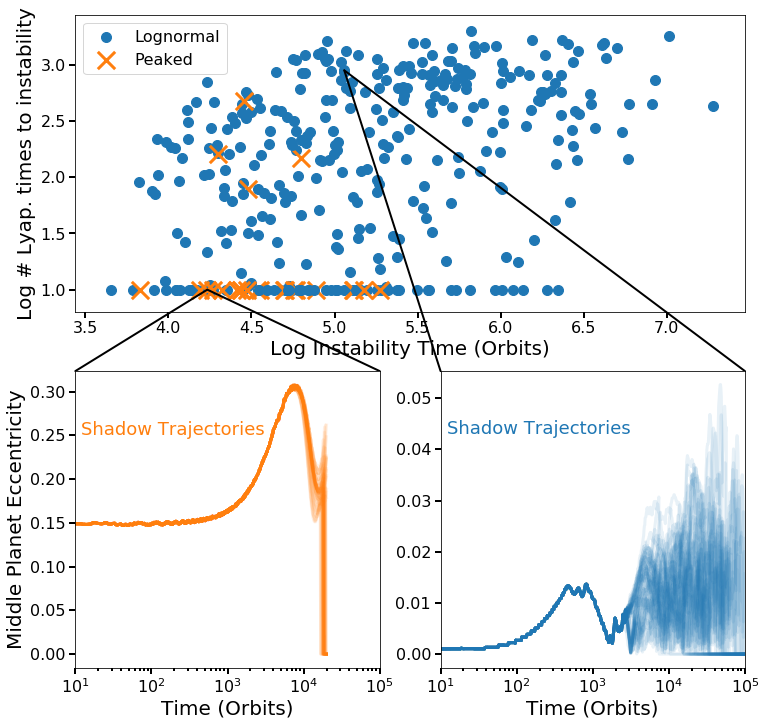

In [15]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = plt.subplot(gs[0, 0:])
cmap = plt.get_cmap("tab10")
ax1.scatter(np.log10(dfrand['instability_time'])[~badrand], np.log10(dfrand['Nlyap10'])[~badrand], c=cmap(0), marker='o', label='Lognormal')
ax1.scatter(np.log10(dfrand['instability_time'])[badrand], np.log10(dfrand['Nlyap10'])[badrand], c=cmap(1), marker='x', s=300, label='Peaked')
ax1.scatter(np.log10(dfres['instability_time'])[~badres], np.log10(dfres['Nlyap10'])[~badres], c=cmap(0), marker='o')
ax1.scatter(np.log10(dfres['instability_time'])[badres], np.log10(dfres['Nlyap10'])[badres], c=cmap(1), marker='x', s=300)
ax1.set_xlabel('Log Instability Time (Orbits)')
ax1.set_ylabel('Log # Lyap. times to instability')
ax1.legend()

peakedID = 60
lognormID = 14
Nshadows=50
datapeaked = np.loadtxt('../csvs/peakedID_60_shadows.npy')
datalognorm = np.loadtxt('../csvs/lognormID_14_shadows.npy')
peakedsample = dfres[dfres['ID']==peakedID]
lognormsample = dfres[dfres['ID']==lognormID]

ax2 = plt.subplot(gs[1, 0])
for i in range(Nshadows):
    ax2.plot(datapeaked[-1,:], datapeaked[i,:], c=cmap(1), alpha=0.1)
ax2.set_xscale('log')

ax3 = plt.subplot(gs[1, 1])
for i in range(Nshadows):
    ax3.plot(datalognorm[-1,:], datalognorm[i,:], c=cmap(0), alpha=0.1)
ax3.set_xscale('log')

ax2.set_xlim([10,1.e5])
ax3.set_xlim([10,1.e5])
ax2.set_ylabel('Middle Planet Eccentricity')
ax2.set_xlabel('Time (Orbits)')
ax3.set_xlabel('Time (Orbits)')

ax1.add_artist(ConnectionPatch(xyA=(np.log10(peakedsample['instability_time']), np.log10(peakedsample['Nlyap10'])), xyB=(0, 1), coordsA="data", coordsB="axes fraction",
                      axesA=ax1, axesB=ax2, color="k", linewidth=2))
ax1.add_artist(ConnectionPatch(xyA=(np.log10(peakedsample['instability_time']), np.log10(peakedsample['Nlyap10'])), xyB=(1, 1), coordsA="data", coordsB="axes fraction",
                      axesA=ax1, axesB=ax2, color="k", linewidth=2))
ax1.add_artist(ConnectionPatch(xyA=(np.log10(lognormsample['instability_time']), np.log10(lognormsample['Nlyap10'])), xyB=(0, 1), coordsA="data", coordsB="axes fraction",
                      axesA=ax1, axesB=ax3, color="k", linewidth=2))
ax1.add_artist(ConnectionPatch(xyA=(np.log10(lognormsample['instability_time']), np.log10(lognormsample['Nlyap10'])), xyB=(1, 1), coordsA="data", coordsB="axes fraction",
                      axesA=ax1, axesB=ax3, color="k", linewidth=2))

ax2.text(12, 0.25, 'Shadow Trajectories', c=cmap(1), fontsize=18)
ax3.text(12, 0.043, 'Shadow Trajectories', c=cmap(0), fontsize=18)
fig.savefig('fig2.pdf', bbox_inches='tight')